<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> Random Forest**</span><br>





<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
from sklearn.tree import plot_tree



In [20]:
df = pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_final.csv')

In [21]:
df

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
0,0,0.722892,0.021002,0.500000,0.291667,0.52,0.041667,0.239376,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.257028,0.000900,0.333333,0.375000,0.76,0.208333,0.196506,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,0.353414,0.247225,0.000000,0.583333,0.94,0.250000,0.283608,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.429719,0.007401,0.333333,0.833333,0.10,0.291667,0.095155,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.867470,0.845785,0.000000,0.125000,0.10,0.250000,0.549746,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.722892,0.026803,0.666667,0.500000,0.54,0.375000,0.260439,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0.738956,0.531653,0.333333,0.583333,0.16,1.000000,0.344195,1,0,...,0,0,0,1,0,0,0,0,0,0
9997,9997,0.995984,0.009601,0.666667,0.458333,0.10,1.000000,0.256598,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0.518072,0.868887,0.666667,0.791667,0.28,0.208333,0.528807,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Splits 

X = df.drop('CarbonEmission', axis=1) 
y = df['CarbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Fits a random forest on training data 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
# Predict labels test data
y_pred = rf.predict(X_test)


In [25]:
from sklearn.metrics import explained_variance_score

# MAE
print("MAE:", mean_absolute_error(y_test, y_pred))

#  MSE
mse = mean_squared_error(y_test, y_pred) 
print("MSE:", mse)

# RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2) 

# Calculate Explained Variance
ev = explained_variance_score(y_test, y_pred)  
print("Explained Variance:", ev)

# Calculate Mean Absolute Percentage Error /(potential overfitting.)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)


MAE: 0.02702759137653327
MSE: 0.001265184343328195
RMSE: 0.03556942989883581
R-squared: 0.9207321681134875
Explained Variance: 0.9207666538102006
MAPE: 13.124451003666081


In [32]:
# Reduce Features to 10
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor() 
tree.fit(X_train, y_train)

# Get feature importances
importances = tree.feature_importances_

# Sort importances and extract most important features
sorted_idx = importances.argsort()
top_features = X_train.columns[sorted_idx][-10:] 

# Train model again with top 10 features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

rf = RandomForestRegressor()
rf.fit(X_train_reduced, y_train)
print("Reduce features_R2", rf.score(X_test_reduced, y_test))
print("Reduce features_MAE", mean_absolute_error(y_test, rf.predict(X_test_reduced)))
print("Reduce features_MSE", mean_squared_error(y_test, rf.predict(X_test_reduced)))
print("Reduce features_RMSE", np.sqrt(mean_squared_error(y_test, rf.predict(X_test_reduced))))  



Reduce features_R2 0.8677797330304595
Reduce features_MAE 0.036534798372774964
Reduce features_MSE 0.002110351799201914
Reduce features_RMSE 0.04593856548916078


In [33]:
print(X_train_reduced.columns)
print(X_test_reduced.columns)


Index(['Sex_female', 'Vehicle Type_hybrid', 'Waste Bag Weekly Count',
       'Vehicle Type_petrol', 'Body Type_obese',
       'How Many New Clothes Monthly',
       'Frequency of Traveling by Air_frequently', 'Vehicle Type_electric',
       'Frequency of Traveling by Air_very frequently',
       'Vehicle Monthly Distance Km'],
      dtype='object')
Index(['Sex_female', 'Vehicle Type_hybrid', 'Waste Bag Weekly Count',
       'Vehicle Type_petrol', 'Body Type_obese',
       'How Many New Clothes Monthly',
       'Frequency of Traveling by Air_frequently', 'Vehicle Type_electric',
       'Frequency of Traveling by Air_very frequently',
       'Vehicle Monthly Distance Km'],
      dtype='object')


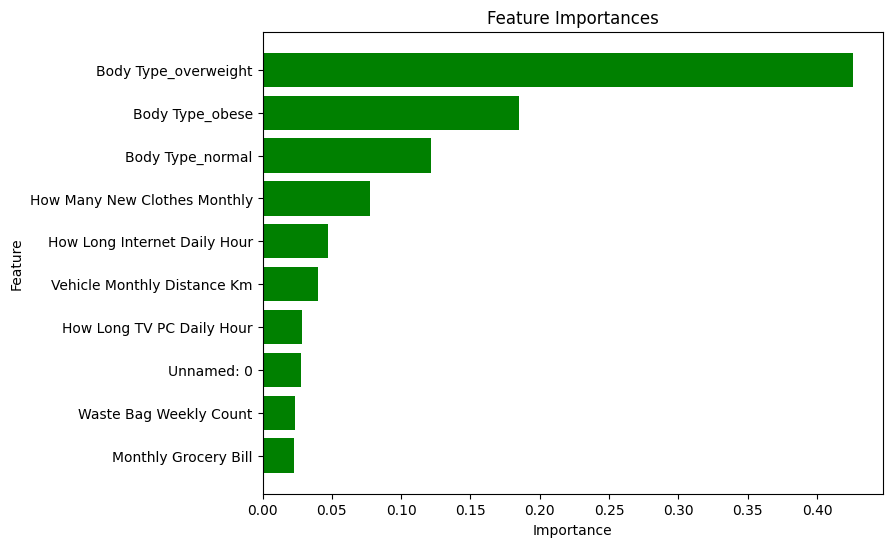

In [34]:

# feature importances
from turtle import color


importances = rf.feature_importances_

# Sort importances and extract labels
sorted_idx = importances.argsort()
top_features = X_train.columns[sorted_idx][-10:]

# Plot 
plt.figure(figsize=(8,6))
plt.barh(range(len(top_features)), importances[sorted_idx][-10:],color='g', align='center')
plt.yticks(range(len(top_features)), top_features)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


The model evaluation metrics are still strong after feature reduction, with high R^2 and low errors. This implies the removed features were likely redundant or not useful for the model predictions. 

In [35]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()

# Cross validate the model
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Print mean and standard deviation of scores
print("Cross-Validation Scores:")
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores:
Mean: 0.9111652439626884
Standard Deviation: 0.0034925525447627144
